In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lars, lars_path

In [3]:
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y = True)

In [4]:
print(diabetes_x.shape)
print(diabetes_y.shape)

(442, 10)
(442,)


In [5]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
    diabetes_x, diabetes_y, test_size=0.2, random_state=42)

.

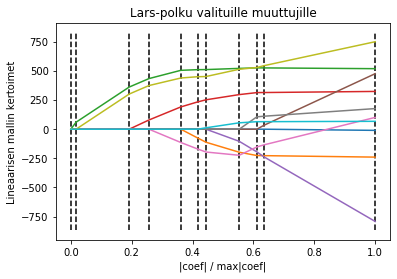

In [8]:
_, _, coefs = lars_path(diabetes_x, diabetes_y, method = 'lars', verbose = True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Lineaarisen mallin kertoimet')
plt.title('Lars-polku valituille muuttujille')
plt.axis('tight')

plt.show()

In [24]:
lars = Lars(fit_intercept = True, n_nonzero_coefs = 4)
lars.fit(data_x_opetus, data_y_opetus)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=4, normalize=True, positive=False, precompute='auto',
     verbose=False)

In [25]:
lars.coef_

array([   0.        ,    0.        ,  546.29491834,  215.34670795,
          0.        ,    0.        , -133.1918626 ,    0.        ,
        381.98617118,    0.        ])

In [26]:
ennustukset_opetus = lars.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
opetus_r2 = r2_score(data_y_opetus, ennustukset_opetus)

print(opetus_mse)
print(opetus_r2)

3133.5447896448222
0.48430883181964535


In [27]:
ennustukset_validointi = lars.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
validointi_r2 = r2_score(data_y_validointi, ennustukset_validointi)

print(validointi_mse)
print(validointi_r2)

2878.4053694464615
0.456715189357804


In [44]:
for i in range(1,11):
    opetus_mse = np.zeros(10)
    validointi_mse = np.zeros(10)
    
    opetus_r2 = np.zeros(10)
    validointi_r2 = np.zeros(10)
    
    for j in range(0, 10):
        data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
            diabetes_x, diabetes_y, test_size=0.2, random_state=42*j)
    
        lars = Lars(fit_intercept = True, n_nonzero_coefs = i)
        lars.fit(data_x_opetus, data_y_opetus)
    
        ennustukset_opetus = lars.predict(data_x_opetus)
        opetus_mse[j] = mean_squared_error(data_y_opetus, ennustukset_opetus)
        opetus_r2[j] = r2_score(data_y_opetus, ennustukset_opetus)
    
        ennustukset_validointi = lars.predict(data_x_validointi)
        validointi_mse[j] = mean_squared_error(data_y_validointi, ennustukset_validointi)
        validointi_r2[j] = r2_score(data_y_validointi, ennustukset_validointi)
    
    print(i)
    print('   Opetus mse: ', np.mean(opetus_mse))
    print('   Validointi mse: ', np.mean(validointi_mse))
    print('   Opetus r^2: ', np.mean(opetus_r2))
    print('   Validointi r^2: ', np.mean(validointi_r2))

1
   Opetus mse:  5638.048954747573
   Validointi mse:  5659.30826554252
   Opetus r^2:  0.04901322129061364
   Validointi r^2:  0.03999222121271072
2
   Opetus mse:  3844.8103702359977
   Validointi mse:  3910.5794181453666
   Opetus r^2:  0.35159426669264915
   Validointi r^2:  0.335339217524821
3
   Opetus mse:  3508.1735751757215
   Validointi mse:  3607.0049467840195
   Opetus r^2:  0.40802628897403126
   Validointi r^2:  0.3882019047024074
4
   Opetus mse:  3084.691092778911
   Validointi mse:  3200.097325223088
   Opetus r^2:  0.47956800341302835
   Validointi r^2:  0.4556094302553455
5
   Opetus mse:  2987.0396928782943
   Validointi mse:  3114.7295115577713
   Opetus r^2:  0.4960223030166738
   Validointi r^2:  0.46981788522216245
6
   Opetus mse:  2932.519300509449
   Validointi mse:  3075.413161126394
   Opetus r^2:  0.5052177244806532
   Validointi r^2:  0.4760247892521057
7
   Opetus mse:  2889.0541773468967
   Validointi mse:  3046.4856286552877
   Opetus r^2:  0.51255706